# Классификация текстов с использованием Наивного Байесовского Классификатора

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [2]:
# откройте данные: ваш код здесь
email_data = pd.read_csv('data/spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# рассчитайте частоты для классов : ваш код здесь
df = email_data.copy()
class_frequencies = df['label'].value_counts(normalize=True)
class_counts = df['label'].value_counts()

print(f'Распределение классов относительное: {class_frequencies}\n')
print(f'Распределение классов количественное: {class_counts}')

Распределение классов относительное: label
0    0.833333
1    0.166667
Name: proportion, dtype: float64

Распределение классов количественное: label
0    2500
1     500
Name: count, dtype: int64


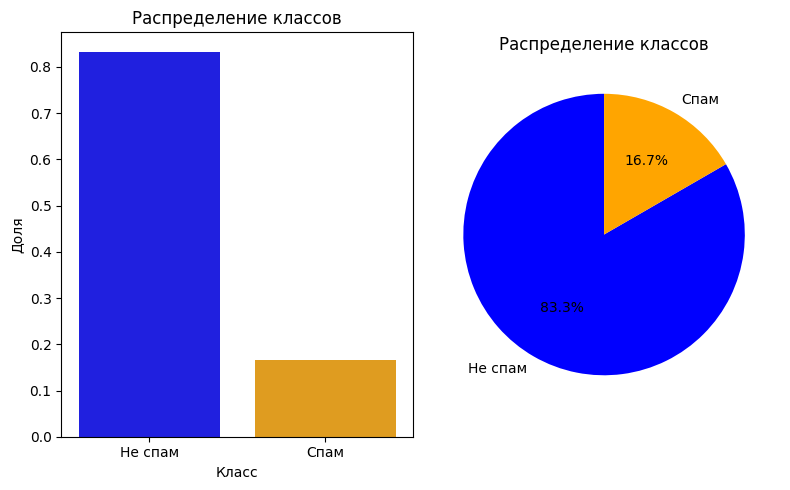

In [4]:
# визуализируйте результат: ваш код здесь
class_frequencies.index = ['Не спам', 'Спам']

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Столбчатая диаграмма 
sns.barplot(data=class_frequencies, palette=['blue', 'orange'], ax=axes[0])
axes[0].set_title('Распределение классов')
axes[0].set_xlabel('Класс')
axes[0].set_ylabel('Доля')

# Круговая диаграмма 
axes[1].pie(
    class_frequencies, 
    labels=['Не спам', 'Спам'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'orange']
)
axes[1].set_title('Распределение классов')
axes[1].set_ylabel('')  # скрываем метку по оси y

plt.tight_layout()
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
#ваш код здесь
df['email'] = df['email'].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)
df['email'] = df['email'].str.lower()
df_cleaned = df.dropna()

print('Число строк до очистки:', len(df))
print('Число строк после очистки:', len(df_cleaned))

Число строк до очистки: 3000
Число строк после очистки: 2997


Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_cleaned["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
#ваш код здесь
num_features = X.shape[1]

print(f'Количество признаков в наборе данных: {num_features}')

Количество признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
#ваш код здесь
y = df_cleaned['label']

print(f'Размер целевой переменной: {y.shape}')
print(f'Размер матрицы признаков: {X.shape}')

Размер целевой переменной: (2997,)
Размер матрицы признаков: (2997, 34116)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 2247
Размер тестовой выборки: 750


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
#ваш код здесь
print(f'Cреднее значение целевой переменной по тестовой выборке: {y_test.mean().round(3)}')

Cреднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
#ваш код здесь
mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train, y_train)

y_pred_train_mnb = mnb.predict(X_train)
y_pred_test_mnb = mnb.predict(X_test)

#Выводим значения метрик для тренировочной выборки
print(classification_report(y_train, y_pred_train_mnb))
#Выводим значения метрик для тестовой выборки
print(classification_report(y_test, y_pred_test_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      0.99      1.00       373

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           1       1.00      0.92      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



In [13]:
cnb = ComplementNB(alpha=0.01)
cnb.fit(X_train, y_train)

y_pred_train_cnb = cnb.predict(X_train)
y_pred_test_cnb = cnb.predict(X_test)

#Выводим значения метрик для тренировочной выборки
print(classification_report(y_train, y_pred_train_cnb))
#Выводим значения метрик для тестовой выборки
print(classification_report(y_test, y_pred_test_cnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1874
           1       1.00      1.00      1.00       373

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [14]:
#ваш код здесь
accuracy_cnb = accuracy_score(y_test, y_pred_test_cnb)
precision_cnb = precision_score(y_test, y_pred_test_cnb)
recall_cnb = recall_score(y_test, y_pred_test_cnb)
f1_cnb = f1_score(y_test, y_pred_test_cnb)

print(f'Точность (Accuracy) ComplementNB: {accuracy_cnb:.3f}')
print(f'Точность (Precision) ComplementNB: {precision_cnb:.3f}')
print(f'Полнота (Recall) ComplementNB: {recall_cnb:.3f}')
print(f'F1-мера ComplementNB: {f1_cnb:.3f}')


Точность (Accuracy) ComplementNB: 0.988
Точность (Precision) ComplementNB: 1.000
Полнота (Recall) ComplementNB: 0.927
F1-мера ComplementNB: 0.962


In [15]:
accuracy_mnb = accuracy_score(y_test, y_pred_test_mnb)
precision_mnb = precision_score(y_test, y_pred_test_mnb)
recall_mnb = recall_score(y_test, y_pred_test_mnb)
f1_mnb = f1_score(y_test, y_pred_test_mnb)

print(f'Точность (Accuracy) MultinomialNB: {accuracy_mnb:.3f}')
print(f'Точность (Precision) MultinomialNB: {precision_mnb:.3f}')
print(f'Полнота (Recall) MultinomialNB: {recall_mnb:.3f}')
print(f'F1-мера MultinomialNB: {f1_mnb:.3f}')

Точность (Accuracy) MultinomialNB: 0.987
Точность (Precision) MultinomialNB: 1.000
Полнота (Recall) MultinomialNB: 0.919
F1-мера MultinomialNB: 0.958


Нарисуйте ROC-кривую:

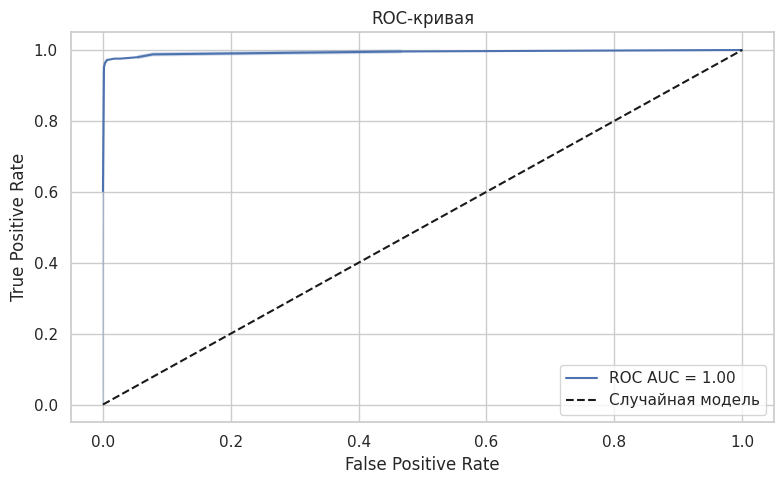

In [22]:
#ваш код здесь
# Предсказанные вероятности для положительного класса
y_pred_proba = cnb.predict_proba(X_test)[:, 1]

# Вычисляем FPR и TPR для построения кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Вычисляем AUC ROC по готовым меткам и вероятностям
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 5))
sns.lineplot(x=fpr, y=tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [26]:
#ваш код здесь
# Задаём сетку параметров
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}

# Настройка GridSearchCV
grid = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучение на обучающей выборке (векторизованной)
grid.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшее значение alpha:", grid.best_params_['alpha'])
print("Лучшая точность (кросс-валидация):", round(grid.best_score_, 3))

# Предсказание и отчёт
y_pred = grid.predict(X_test)
print("\nКлассификационный отчет на тесте:\n")
print(classification_report(y_test, y_pred))

Лучшее значение alpha: 0.5
Лучшая точность (кросс-валидация): 0.991

Классификационный отчет на тесте:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       0.99      0.98      0.98       124

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



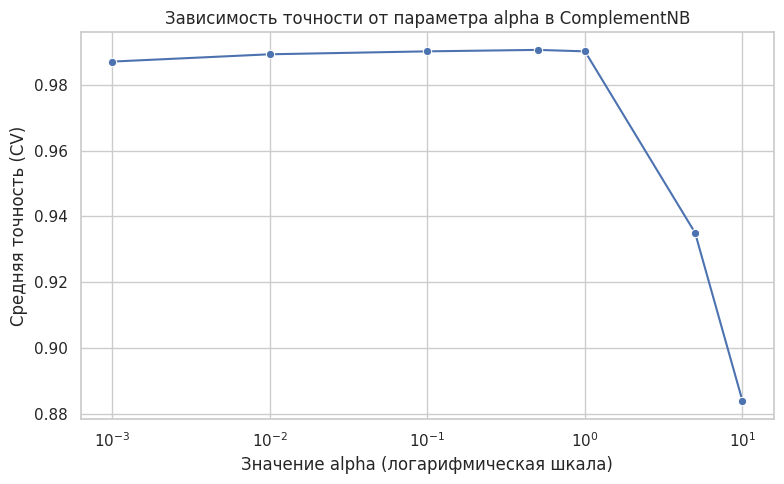

In [27]:
# Получаем результаты
results = pd.DataFrame(grid.cv_results_)
alphas = results['param_alpha'].astype(float)
mean_scores = results['mean_test_score']

# Визуализация
plt.figure(figsize=(8, 5))
sns.lineplot(x=alphas, y=mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('Значение alpha (логарифмическая шкала)')
plt.ylabel('Средняя точность (CV)')
plt.title('Зависимость точности от параметра alpha в ComplementNB')
plt.grid(True)
plt.tight_layout()
plt.show()

Наблюдается, что слишком маленькие или слишком большие значения alpha могут ухудшать результат.